# **BITS Group 91 _ NLP _ Problem Statement 1**

---



---


Mtech in AI/ML

Names:

KASHIF SAIYED - 2022ac05668@wilp.bits-pilani.ac.in
VAIBHAV KUMAR GAUTAM - 2022ac05413@wilp.bits-pilani.ac.in
SACHEEN M V - 2022ac05305@wilp.bits-pilani.ac.in
KULKARNI MANGESH MADHUKAR - 2022ac05705@wilp.bits-pilani.ac.in


In [49]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
from google.colab import drive
import os
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np


Load Dataset

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Place the data from https://drive.google.com/file/d/1e90oQiPhb5UcVdE8EjzXc0Fr1pIxEx_S/view?usp=sharing and place in the below URL
Dataurl= os.path.join('/content/drive/My Drive/Reviews/Reviews_F1.csv')

# Read File
df = pd.read_csv(Dataurl)

In [5]:
# Print sample from dataset
df

,ID,Text
0,1,I love these cookies. I am on the paleo diet r...
1,2,I thought I'd try the multi-pack to see which ...
2,3,i just started the paleo diet and i love it! l...
3,4,"I've been Paleo for six months, as has my part..."
4,5,I bought a 40 sampler pack from the caveman ba...
...,...,...
1389,1390,I would have given this 5 stars but took one o...
1390,1391,I bought this along with the easy freeze ice c...
1391,1392,Just right for making dan dan noodles and othe...
1392,1393,"milder than most vinegars, but with its own ve..."


# Part I - Recommend the top 3 words to complete the given sentence using n-gram language model

In [8]:
# Create Corpus
corpus = ' '.join(df['Text'])
print (corpus)

# Tokenize using punkt
nltk.download('punkt')
tokens = word_tokenize(corpus.lower())
print (tokens)



I love these cookies. I am on the paleo diet right now and these cookies are what I look forward too. I do like the taste of the tropical one the best. They all have different taste but if you want something that is grain free and gluten free then this is the right place. I expected the taste to be different and it is. Other reviewers seem to expect them to taste like oreos or chips ahoy. Of course not.<br /><br />When I eat them, I don't even feel bad about it because my body welcomes them. They don't make me crash either and feel like I ate junk food. It is a good indicator that these were made from all natural ingredients. I wish I had these cookies close to me. I'd buy them every single day! I thought I'd try the multi-pack to see which flavor I liked the best, but I like them all. They are healthy, fulfilling, and all good ingredients I can actually pronounce. These are the smaller packs, and now I can proceed to ordering the larger bags. Love these cookies! i just started the pal

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'love', 'these', 'cookies', '.', 'i', 'am', 'on', 'the', 'paleo', 'diet', 'right', 'now', 'and', 'these', 'cookies', 'are', 'what', 'i', 'look', 'forward', 'too', '.', 'i', 'do', 'like', 'the', 'taste', 'of', 'the', 'tropical', 'one', 'the', 'best', '.', 'they', 'all', 'have', 'different', 'taste', 'but', 'if', 'you', 'want', 'something', 'that', 'is', 'grain', 'free', 'and', 'gluten', 'free', 'then', 'this', 'is', 'the', 'right', 'place', '.', 'i', 'expected', 'the', 'taste', 'to', 'be', 'different', 'and', 'it', 'is', '.', 'other', 'reviewers', 'seem', 'to', 'expect', 'them', 'to', 'taste', 'like', 'oreos', 'or', 'chips', 'ahoy', '.', 'of', 'course', 'not.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'when', 'i', 'eat', 'them', ',', 'i', 'do', "n't", 'even', 'feel', 'bad', 'about', 'it', 'because', 'my', 'body', 'welcomes', 'them', '.', 'they', 'do', "n't", 'make', 'me', 'crash', 'either', 'and', 'feel', 'like', 'i', 'ate', 'junk', 'food', '.', 'it', 'is', 'a', 'good', 'indicato

In [13]:
# Create Bigrams basis tokens
bigrams = list(nltk.bigrams(tokens))
print ("bigrams: ", bigrams[0:5])

# Count occurrences of each bigram
bigram_counts = Counter(bigrams)
print ("bigram_counts: " , bigram_counts)


bigrams:  [('i', 'love'), ('love', 'these'), ('these', 'cookies'), ('cookies', '.'), ('.', 'i')]
bigram_counts:  Counter({('.', 'i'): 1397, ('<', 'br'): 1387, ('br', '/'): 1387, ('/', '>'): 1387, ('>', '<'): 549, (',', 'and'): 456, (',', 'but'): 441, ('.', 'it'): 425, ('.', 'the'): 423, ('of', 'the'): 376, ('it', "'s"): 342, ('i', 'have'): 317, (',', 'i'): 314, ('in', 'the'): 304, ('it', 'is'): 279, ('.', 'this'): 267, ('this', 'is'): 257, ('do', "n't"): 230, ('and', 'i'): 213, ('!', '!'): 211, ('!', 'i'): 200, ('i', 'was'): 200, ('if', 'you'): 198, ('it', '.'): 195, ('is', 'a'): 191, ('i', "'m"): 187, ('they', 'are'): 185, ('i', "'ve"): 177, ('and', 'the'): 175, ('.', 'my'): 175, ('.', 'they'): 170, ('i', 'do'): 166, ('this', 'product'): 161, ('the', 'best'): 158, ('on', 'the'): 157, ('in', 'a'): 157, ('for', 'a'): 152, ('is', 'the'): 148, ('it', 'was'): 148, ('to', 'the'): 147, ('so', 'i'): 144, ('but', 'i'): 143, ('>', 'i'): 138, ('that', 'i'): 136, ('i', 'am'): 135, (',', 'so'): 13

In [14]:
#Recommend the top 3 words to complete the given sentence using N-gram language model
def recommend_words(partial_sentence):
    last_word = partial_sentence.split()[-1].lower()

    #  bigrams that start with last 2 words
    relevant_bigrams = [(w1, w2) for w1, w2 in bigram_counts.keys() if w1 == last_word]

    # Sort relevant bigrams based on count
    sorted_bigrams = sorted(relevant_bigrams, key=lambda x: bigram_counts[x], reverse=True)

    # Extract the top 3 words from the most frequent bigrams
    recommended_words = [w2 for _, w2 in sorted_bigrams[:3]]

    return recommended_words

In [16]:
#Test statement
partial_sentence = "I like"

recommended_words = recommend_words(partial_sentence)

print(f"\nRecommended words: {recommended_words}")


Recommended words: ['the', 'a', 'it']


## **The recommendations for the partial sentence"I like" are "I like the ..", "I like a", and "I like it"**

# PART  II(i) - Text Preprocessing

In [23]:
# Extract text column from the DataFrame
text_column = df['Text']
print ("Data sample: ", text_column[0])

# Tokenize
df['token_text'] = text_column.apply(lambda x: word_tokenize(x))
print( "tokenization:" , df["token_text"][1])

# Lowercase
df['lower_txt'] = df['token_text'].apply(lambda x: [word.lower() for word in x])
print("lowercase:" ,df['lower_txt'][1])

# Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['nostopwd_txt'] = df['lower_txt'].apply(lambda x: [word for word in x if word not in stop_words])
print("stop words removal: ", df['nostopwd_txt'][1])

# Stemmer
stemmer = PorterStemmer()
df['stemmed_txt'] = df['nostopwd_txt'].apply(lambda x: [stemmer.stem(word) for word in x])
print("stemmer: " ,df['stemmed_txt'][1])

#Lemma
nltk.download('wordnet')
lemma = WordNetLemmatizer()
df['lemma_text'] = df['nostopwd_txt'].apply(lambda x: [lemma.lemmatize(word) for word in x])
print("lemma: " ,df['lemma_text'][1])

Data sample:  I love these cookies. I am on the paleo diet right now and these cookies are what I look forward too. I do like the taste of the tropical one the best. They all have different taste but if you want something that is grain free and gluten free then this is the right place. I expected the taste to be different and it is. Other reviewers seem to expect them to taste like oreos or chips ahoy. Of course not.<br /><br />When I eat them, I don't even feel bad about it because my body welcomes them. They don't make me crash either and feel like I ate junk food. It is a good indicator that these were made from all natural ingredients. I wish I had these cookies close to me. I'd buy them every single day!
tokenization: ['I', 'thought', 'I', "'d", 'try', 'the', 'multi-pack', 'to', 'see', 'which', 'flavor', 'I', 'liked', 'the', 'best', ',', 'but', 'I', 'like', 'them', 'all', '.', 'They', 'are', 'healthy', ',', 'fulfilling', ',', 'and', 'all', 'good', 'ingredients', 'I', 'can', 'actua

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


stemmer:  ['thought', "'d", 'tri', 'multi-pack', 'see', 'flavor', 'like', 'best', ',', 'like', '.', 'healthi', ',', 'fulfil', ',', 'good', 'ingredi', 'actual', 'pronounc', '.', 'smaller', 'pack', ',', 'proceed', 'order', 'larger', 'bag', '.', 'love', 'cooki', '!']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


lemma:  ['thought', "'d", 'try', 'multi-pack', 'see', 'flavor', 'liked', 'best', ',', 'like', '.', 'healthy', ',', 'fulfilling', ',', 'good', 'ingredient', 'actually', 'pronounce', '.', 'smaller', 'pack', ',', 'proceed', 'ordering', 'larger', 'bag', '.', 'love', 'cooky', '!']


# PART II (ii) - Feature Extraction

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_column = df['lemma_text']

#lemma text to str
text_str = text_column.apply(lambda x: ' '.join(x))

# Create TF-IDF
tfidf_vect= TfidfVectorizer(max_features=500)

# Fit and transform the text data
tfidf_m = tfidf_vect.fit_transform(text_str)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_m.toarray(), columns=tfidf_vect.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
result_df = pd.concat([df, tfidf_df], axis=1)

print( result_df.sample(1))

      ID                                               Text  \
139  140  I've tried tons of GF pancake mixes.  I could ...   

                                            token_text  \
139  [I, 've, tried, tons, of, GF, pancake, mixes, ...   

                                             lower_txt  \
139  [i, 've, tried, tons, of, gf, pancake, mixes, ...   

                                          nostopwd_txt  \
139  ['ve, tried, tons, gf, pancake, mixes, ., coul...   

                                           stemmed_txt  \
139  ['ve, tri, ton, gf, pancak, mix, ., could, cho...   

                                            lemma_text   10   12   15  ...  \
139  ['ve, tried, ton, gf, pancake, mix, ., could, ...  0.0  0.0  0.0  ...   

     wonderful  work  worth  would  wrong  www      year  yet  yuban  yummy  
139        0.0   0.0    0.0    0.0    0.0  0.0  0.226254  0.0    0.0    0.0  

[1 rows x 507 columns]


In [28]:
# Write to CSV for reviewing
result_df.to_csv("NLP_ASS1.csv")

# PART II (iii) Similarity Analysis

In [90]:
tfidf_features = result_df.drop(['token_text','stemmed_txt','lower_txt','nostopwd_txt','lemma_text'], axis=1)

# Extract vectorized representations
vectorized_data = tfidf_features.iloc[:, 2:].values  # Assuming the TF-IDF features start from the second column

# Calculate cosine similarity matrix excluding self-similarity # we are using cosine similarity  as it is a high /
# dimension space and sparse. Cosine will work well for this type of data. Also it is computationally efficient.
similarity_matrix = cosine_similarity(vectorized_data, vectorized_data)

# Exclude self-similarity scores
np.fill_diagonal(similarity_matrix, -1)

# Create an empty list to store rows
result_rows = []

# Iterate over rows to find the most similar document and similarity score
for i, row in enumerate(similarity_matrix):
    # Find the index of the most similar document
    most_similar_idx = np.argmax(row)

    # Get the most similar document and similarity score
    most_similar_doc = tfidf_features.iloc[most_similar_idx]['Text']
    similarity_score = row[most_similar_idx]

    # Add the values to the list
    result_rows.append({
        "original_df_col": tfidf_features.iloc[i]['Text'],
        "most_similar_doc": most_similar_doc,
        "similarity_score": similarity_score
    })

# Create the DataFrame using concat
data = pd.concat([pd.DataFrame([row]) for row in result_rows], ignore_index=True)

# Remove rows with the same values in 'original_df_col' and 'most_similar_doc', these are most likely duplicates
data = data[data['similarity_score'] < 0.999]

# Sort the DataFrame by 'similarity_score' column in descending order
data = data.sort_values(by='similarity_score', ascending=False)

# Reset the index after sorting
data = data.reset_index(drop=True)


# Print the sorted DataFrame
print(data.head(2))
#data.to_csv("similarity_data.csv")



                                     original_df_col  \
0  When I saw some of the Earth's Best jars offer...   
1  I've ordered these before and I am still thril...   

                                    most_similar_doc  similarity_score  
0  When I saw some of the Earth's Best jars offer...          0.996621  
1  It is a lot of beans to go through but the fla...          0.945244  


In [102]:
print("Top two similar documents are:")
print("1st Combo : Document1: " , data.iloc[0,0])
print("1st Combo : Document2: " , data.iloc[0,1])
print("1st Combo : Similarity Score: ", data.iloc[0,2])
print ()
print("2nd Combo : Document1: " , data.iloc[1,0])
print("2nd Combo : Document2: " , data.iloc[1,1])
print("2nd Combo : Similarity Score: ", data.iloc[1,2])


Top two similar documents are:
1st Combo : Document1:  When I saw some of the Earth's Best jars offered as a Gold Box deal, I remembered that I needed to offer a caveat to other parents.<br />  My children have previously enjoyed many Earth's Best flavors, which in general taste quite good, so in February when there was a promotional offer through Amazon, we ordered two 12-packs of the tender beef spinach. When they arrived, one of the 12-packs seemed ok, but the other 12-pack contained several broken jars and was leaking. It smelled and looked like there might be mold under the plastic that surrounded the second 12-pack.<br />  I noticed that the shipping box holding the two 12-packs had air-filled padding on only the top side of the box, which meant that there was no padding protecting the bottom side.<br />  I don't know whether some of the jars had broken at the warehouse or during delivery, but either way, I was afraid to use the unbroken jars too, because what if the seals had br

# As printed above, 1st Combo is the highest matching documents with cosine similarity of 0.9966 .. and a 2nd highest matching documents have a similarity of 0.945

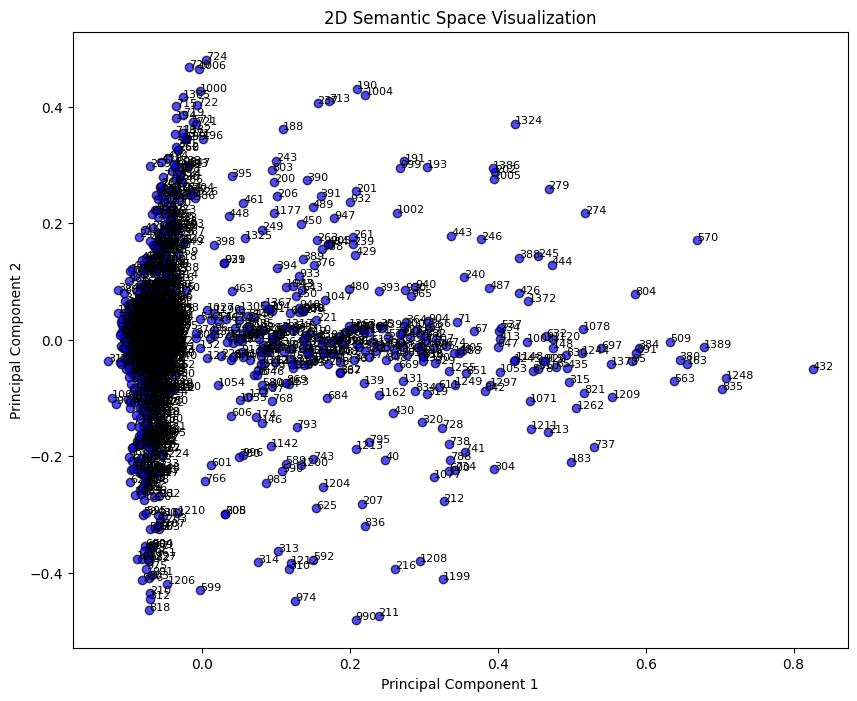

In [91]:
# Apply PCA for dimensionality reduction
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(vectorized_data)

# Check for NaN values in PCA results
if pd.DataFrame(pca_result).isna().any().any():
    print("NaN values present after PCA transformation. Please inspect and handle them.")
else:
    # Visualize in 2D space
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolors='k', alpha=0.7)
    for i, doc_name in enumerate(tfidf_features['ID']):
        plt.annotate(doc_name, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

    plt.title('2D Semantic Space Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()